<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#What-is-Classification?" data-toc-modified-id="What-is-Classification?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong><font color="red">What is Classification?</font></strong></a></span></li><li><span><a href="#So-What-Are-the-Types-of-Classification?" data-toc-modified-id="So-What-Are-the-Types-of-Classification?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong><font color="orange">So What Are the Types of Classification?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Acquiring" data-toc-modified-id="Acquiring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquiring</a></span><ul class="toc-item"><li><span><a href="#Create-your-DataFrame-using-a-SQL-query-to-access-a-database" data-toc-modified-id="Create-your-DataFrame-using-a-SQL-query-to-access-a-database-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Create your DataFrame using a SQL query to access a database</strong></a></span></li><li><span><a href="#Create-your-DataFrame-using-a-csv-file,-a-Google-sheet,-from-AWS-S3" data-toc-modified-id="Create-your-DataFrame-using-a-csv-file,-a-Google-sheet,-from-AWS-S3-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Create your DataFrame using a csv file, a Google sheet, from AWS S3</strong></a></span></li><li><span><a href="#Create-your-DataFrame-using-copy-pasted-tabular-data" data-toc-modified-id="Create-your-DataFrame-using-copy-pasted-tabular-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>Create your DataFrame using copy-pasted tabular data</strong></a></span></li><li><span><a href="#Create-your-DataFrame-using-an-Excel-sheet" data-toc-modified-id="Create-your-DataFrame-using-an-Excel-sheet-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>Create your DataFrame using an Excel sheet</strong></a></span></li><li><span><a href="#Create-your-DataFrame-using-Pydata-sets-and-Read-the-Doc" data-toc-modified-id="Create-your-DataFrame-using-Pydata-sets-and-Read-the-Doc-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Create your DataFrame using Pydata sets and Read the Doc</strong></a></span></li></ul></li><li><span><a href="#Preparation---Imputing-and-Encoding-Focus" data-toc-modified-id="Preparation---Imputing-and-Encoding-Focus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparation - Imputing and Encoding Focus</a></span><ul class="toc-item"><li><span><a href="#What-are-Imputing-and-Encoding?" data-toc-modified-id="What-are-Imputing-and-Encoding?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong><font color="red">What are Imputing and Encoding?</font></strong></a></span></li><li><span><a href="#So-What-Are-They-For?" data-toc-modified-id="So-What-Are-They-For?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong><font color="orange">So What Are They For?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Exploring" data-toc-modified-id="Exploring-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring</a></span><ul class="toc-item"><li><span><a href="#What-is-EDA-(Exploratory-Data-Analysis)?" data-toc-modified-id="What-is-EDA-(Exploratory-Data-Analysis)?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong><font color="red">What is EDA (Exploratory Data Analysis)?</font></strong></a></span></li><li><span><a href="#So-What-Types-of-Viz-are-best-for-exploring-categorical-vs-continuous-data?" data-toc-modified-id="So-What-Types-of-Viz-are-best-for-exploring-categorical-vs-continuous-data?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong><font color="orange">So What Types of Viz are best for exploring categorical vs continuous data?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><font color="green">Now What?</font></a></span></li></ul></li><li><span><a href="#Evaluating" data-toc-modified-id="Evaluating-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating</a></span><ul class="toc-item"><li><span><a href="#What-Are-Evaluation-Metrics-for-Classification-Models?" data-toc-modified-id="What-Are-Evaluation-Metrics-for-Classification-Models?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><strong><font color="red">What Are Evaluation Metrics for Classification Models?</font></strong></a></span></li><li><span><a href="#So-What-If...?" data-toc-modified-id="So-What-If...?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><strong><font color="orange">So What If...?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Modeling-to-come..." data-toc-modified-id="Modeling-to-come...-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling to come...</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#What-Are-Types-of-Classification-Models?" data-toc-modified-id="What-Are-Types-of-Classification-Models?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><strong><font color="red">What Are Types of Classification Models?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

from explore import anatomy_of_a_figure
from env import host, user, password

## Classification

### **<font color=red>What is Classification?</font>**

**Classification is a Supervised Machine Learning technique.** Like Regression, Classification also uses labeled data from a training dataset to learn rules for making future predictions on unseen data. However, **Classification is used to predict the category membership of the target value (label).** For Classification algorithms, you determine the probability of an observation to be part of a certain class or not. Therefore, you express the probability with a value between 0 and 1. A probability close to 1 means the observation is very likely to be part of a category.

**Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.**

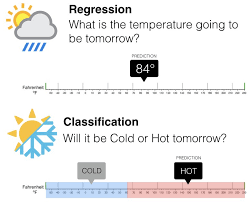

You still use a p-value to determine if you will reject or fail to reject your Null Hypothesis. **Remember that the null hypothesis states: there is not correlation between the features and the target.**

### **<font color=orange>So What Are the Types of Classification?</font>**

**Types of Classification**

>**Binary Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: churn/not churn, pass/fail, male/female, smoker/non-smoker, healthy/sick.

>**Multiclass Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: A/B/C, hot/warm/cold, Python/Java/C++/Go/C

![image.png](https://developers.google.com/machine-learning/guides/text-classification/images/LastLayer.png)

**Uses for Classification**

- Medical Diagnosis


- Spam Detection


- Credit Approval


- Targeted Marketing

### **<font color=green>Now What?</font>**

Check out [this article](https://towardsdatascience.com/the-complete-guide-to-classification-in-python-b0e34c92e455) on Classification.

We will work through the data science pipeline focused on preparing for Classification Modeling.

## Acquiring

**<font color=green>A Few Example Methods for Creating Pandas DataFrames</font>**

### **Create your DataFrame using a SQL query to access a database**

**<font color=purple>Use your env file and a handy function to get your connection_url argument</font>**

`from env import host, pasword, user`

`def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'`
    
`sql_query = 'write your sql query here; test it in Pancakes first'`

`pd.read_sql(sql_query, connection_url)`

**<font color=purple>Put it all together in a single function and throw it into a .py file.</font>**

`def get_titanic_data():
    return pd.read_sql(query, get_connection('titanic_db'))`

In [2]:
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
sql_query = 'SELECT * FROM passengers'

In [4]:
def get_titanic_data():
    return pd.read_sql(sql_query, get_connection('titanic_db'))

In [5]:
titanic_df = get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


### **Create your DataFrame using a csv file, a Google sheet, from AWS S3**

`pd.read_csv()`

**<font color=purple>If you are going to read in a Google sheet using its Share url, you can format it correctly using the following:</font>**

`sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'`  

`csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')`

`df_googlesheet = pd.read_csv(csv_export_url)`

In [6]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [7]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [8]:
df_googlesheet = pd.read_csv(csv_export_url)

# I'm adding a column here, `is_female` for use later in the notebook
df_googlesheet['Is_female'] = df_googlesheet.Sex.map({'female': 1, 'male': 0})

df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


### **Create your DataFrame using copy-pasted tabular data**

`pd.read_clipboard(header=None, names=colums)`

### **Create your DataFrame using an Excel sheet**

`pd.read_excel('Excel_Workbook.xlsx', sheet_name='Table1_name', usecols=['this_one', 'this_one'])`

In [9]:
customers_df = pd.read_excel('my_telco_churn.xlsx', sheet_name='Table2_CustDetails')
customers_df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn
0,7569-NMZYQ,Female,0,Yes,Yes,2,2,2,Bank transfer (automatic),118.75,8672.45,73.031158,No
1,8984-HPEMB,Female,0,No,No,2,2,2,Electronic check,118.65,8477.60,71.450485,No
2,5734-EJKXG,Female,0,No,No,2,2,1,Electronic check,118.60,7365.70,62.105396,No


### **Create your DataFrame using Pydata sets and Read the Doc**

`from pydataset import data`

`data('iris', show_doc=True)`

`df_iris = data('iris')`

In [10]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [11]:
# Using Seaborn Datasets

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [12]:
# Using Sklearn Datasets, dictionary-like object

from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [13]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
iris_df['species'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**Other Seaborn Datasets you can use are linked [here](https://github.com/mwaskom/seaborn-data)**

**More on sklearn dataset loading utilities [here](https://scikit-learn.org/stable/datasets/index.html)**

## Preparation - Imputing and Encoding Focus

### **<font color=red>What are Imputing and Encoding?</font>**

Imputation is the process of replacing missing data with substituted values. You might choose to impute the mean, median, or mode of a given column to fill any holes or cells with missing data. Maybe you want to do something a little more complex like use a linear regression model to predict the missing values that you will impute. Depending on the situation, you might just decide to drop rows or columns that have more than a certain percentage of missing values. Whatever you decide to do, you first need to inspect your dataset for Null values.

### **<font color=orange>So What Are They For?</font>**

**What is Label Encoding**

Encoding is when you convert a string to an integer representation making a categorical value useable in a ML model.

Encoding with LabelEncoder() converts each unique value in the column you wish to encode into an integer representing the original value. **This is useful when there is meaning to the order of your categorical values.**

One-hot Encoding is when we create a new column for each value in the oringinal column we wish to encode. Each observation in our DataFrame will have either a 0 or a 1 to indicate which of the new columns represent its value in the original column. **This is useful when the order of your categorical values does not carry meaning.** Beware of the curse of dimensionality when using One-hot; it can quickly increase the number of columns, and therfore complexity, of your model exponentially.

### **<font color=green>Now What?</font>**

**Here are a few ways to quickly check your dataset for missing values:**

>**<font color=purple>You can actually use a heatmap to visualize Null values in your dataset!</font>**

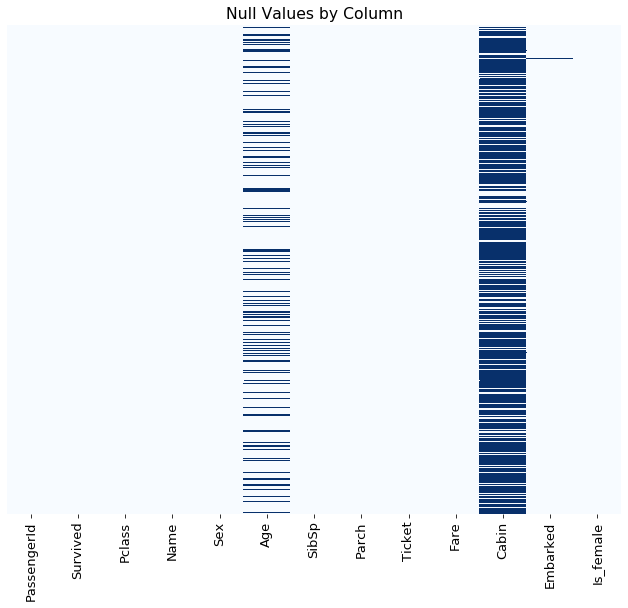

In [16]:
sns.heatmap(df_googlesheet.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

>**<font color=purple>Total missing values by column</font>**

In [17]:
df_googlesheet.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Is_female        0
dtype: int64

>**<font color=purple>Percent of missing values by column</font>**

In [18]:
round(df_googlesheet.isna().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Is_female       0.00
dtype: float64

**<font color=red>Split before you begin doing specific exploration or calculations as you do data processing</font>**

In [19]:
train, test = train_test_split(df_googlesheet, train_size=.75, random_state=123)

>**<font color=purple>Investigate the relationship between two columns</font>**

In [20]:
pd.crosstab(train.SibSp, train.Parch)

Parch,0,1,2,3,4,5
SibSp,,,,,,
0,405,25,23,1,0,2
1,93,44,14,2,2,2
2,14,4,3,1,0,0
3,1,5,6,0,0,0
4,0,5,6,0,0,0
5,0,0,3,0,0,0
8,0,0,7,0,0,0


>**<font color=purple>Check the missing values in subgroups. Zach's cool code snippet!</font>**

In [21]:
train.groupby(['Survived', 'Pclass', 'Sex']).agg(lambda s: s.isna().sum())

PassengerId  Name   Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass Sex                                                           
0        1      female            0     0   0.0      0      0       0   0.0   
                male              0     0  10.0      0      0       0   0.0   
         2      female            0     0   0.0      0      0       0   0.0   
                male              0     0   7.0      0      0       0   0.0   
         3      female            0     0  14.0      0      0       0   0.0   
                male              0     0  70.0      0      0       0   0.0   
1        1      female            0     0   6.0      0      0       0   0.0   
                male              0     0   3.0      0      0       0   0.0   
         2      female            0     0   1.0      0      0       0   0.0   
                male              0     0   1.0      0      0       0   0.0   
         3      female            0     0  21.0      0      0       0   0.0   
                male              0     0   6.0      0      0       0   0.0   

                        Cabin  Embarked  Is_female  
Survived Pclass Sex                                 
0        1      female      0         0          0  
                male       15         0          0  
         2      female      4         0          0  
                male       69         0          0  
         3      female     54         0          0  
                male      220         0          0  
1        1      female     11         2          0  
                male        6         0          0  
         2      female     46         0          0  
                male        7         0          0  
         3      female     54         0          0  
                male       36         0          0

>**<font color=purple>A few options for Handling Null Values</font>**

**Fill all missing values in your train and test DataFrames with NaN**

`train, test = fill_na(train, test, np.nan)`

**Fill a column in your train and test with 0 in original DataFrames**

`train['col'] = train['col'].fillna(0)`

`test['col'] = test['col'].fillna(0)`

**Fill the mean age for men and the mean age for women**

`def fill_age(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age`
        
`train['Age'] = train[['Age','Sex']].apply(fill_age,axis=1)`

**Fill with overall average from the training data**

In [22]:
#Calculate our fill value using train only

avg_age = train.Age.mean()   

train.Age = train.Age.fillna(avg_age)

test.Age = test.Age.fillna(avg_age)

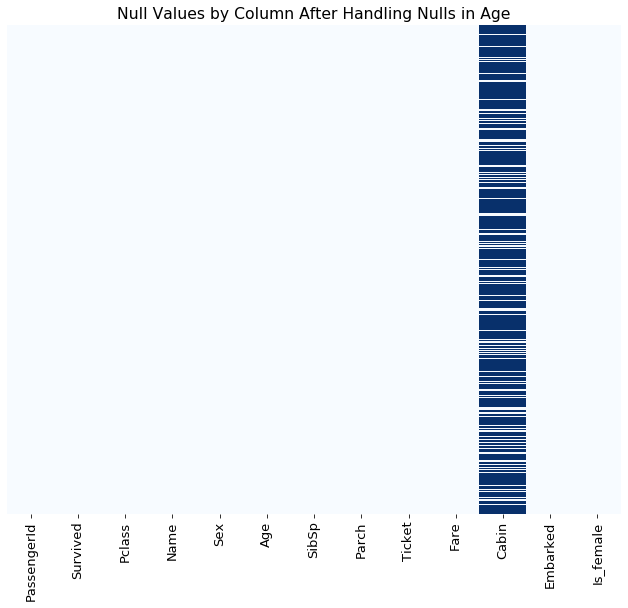

In [23]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column After Handling Nulls in Age')
plt.show()

>**<font color=purple>Using SimpleImputer from sklearn</font>**

**Create the imputer**

`imputer = sklearn.impute.SimpleImputer(strategy='mean')`

**Fit the imputer**

`imputer.fit(train[['column']])`

**Use the Imputer**

`train.column = imputer.transform(train[['column']])`

`test.column = imputer.transform(test[['column']])`

**What if our missing value is a categorical?**

- Find the most frequent value

`train.column.value_counts(dropna=False)`   

- Fill that value into train and test

`train.column = train.column.fillna('categorical_value')`  

`test.column = test.column.fillna('categorical_value')`

>**<font color=purple>Using sklearn LabelEncoder()</font>** 

**Create Encoder Object**

`le = LabelEncoder()`

**Fit and Transform train and test**

`train['col'] = le.fit_transform(train.col_to_encode)`

`test['col'] = le.transform(test.col_to_encode)`

**Decode Your Encoded Column**

`train['col'] = le.inverse_transform(train.col_to_decode)`

`test['col'] = le.inverse_transform(test.col_to_decode)`

>**<font color=purple>Using sklearn OneHotEncoder()</font>**

**Create OHE Object**

`ohe = OneHotEncoder(sparse=False, categories='auto')`

**Fit and Transform to create array of values**

`train_matrix = ohe.fit_transform(train[['col']])`

`test_matrix = ohe.fit_transform(test[['col']])`

**Convert Array to DataFrame of Encoded Columns**

`train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)`

`test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)`

**Join Your DataFrame of Encoded Columns to your original train or test DataFrame**

`train = train.join(train_ohe)`

`test = test.join(test_ohe)`

## Exploring

![image.png](https://eazybi.com/static/img/blog_page/posts/2016_03_01/tufte-wallpaper.png)

### **<font color=red>What is EDA (Exploratory Data Analysis)?</font>**

Exploratory Data Analysis involves learning more about the data you're working with. One reason to perform EDA is to visualize parts of the data to better understand the correlation between the features and the target.

**The preparation for your dataset for exploration may not be the same as the prepartion of your dataset for modeling.** The requirements of Machine Learning algorithms do not always overlap with the requirements for good data visualization or exploration.

### **<font color=orange>So What Types of Viz are best for exploring categorical vs continuous data?</font>**

How do you decide what chart to use? Should you aggregate your data to get a better view? Are you making a comparison or showing a relationship between variables? Do you want to display the distribution or composition of your dataset? These are important questions to ask yourself when deciding on types of chart to use and data aggregations for exploration.

Read more about how to choose a chart [here](https://eazybi.com/blog/data_visualization_and_chart_types/).

![image](https://eazybi.com/static/img/blog_page/posts/2016_03_01/chart-selection-diagram.png)

### <font color=green>Now What?</font>

**Here's a collection of possibilities for exploring categorical and continuous values.**

Set uniform chart and font sizes at the top of your notebook if you like.

`plt.rc('figure', figsize=(num, num))`

`plt.rc('font', size=13)`

>**<font color=purple>Barplot subplots using `sns.countplot()` to Compare Categorical Values in `Embarked`</font>**

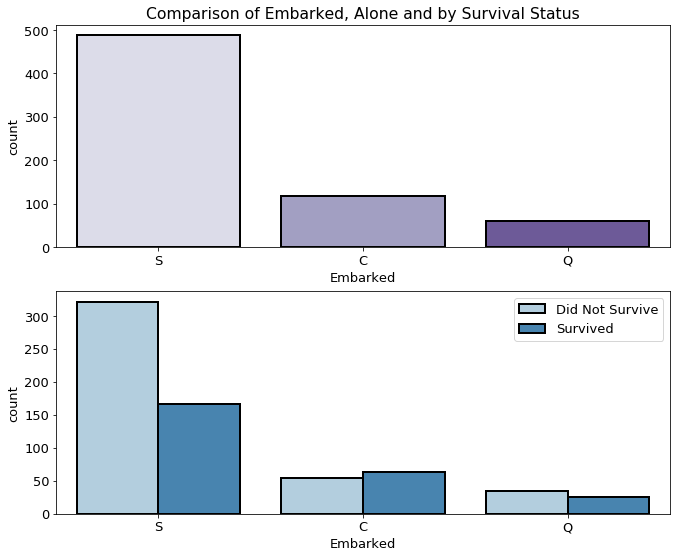

In [24]:
plt.subplot(211)

sns.countplot(x = 'Embarked', data=train, palette='Purples', ec='black', linewidth=2)
plt.title('Comparison of Embarked, Alone and by Survival Status')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'Embarked', hue = 'Survived', data=train, palette='Blues', ec='black', linewidth=2)

plt.legend(['Did Not Survive', 'Survived'])

plt.show()

>**<font color=purple>Boxplots to show Distribution of Age by Sex and Survival</font>**

`sns.boxplot(x='categorical', y='continous', data=train , hue=another_cat  )`

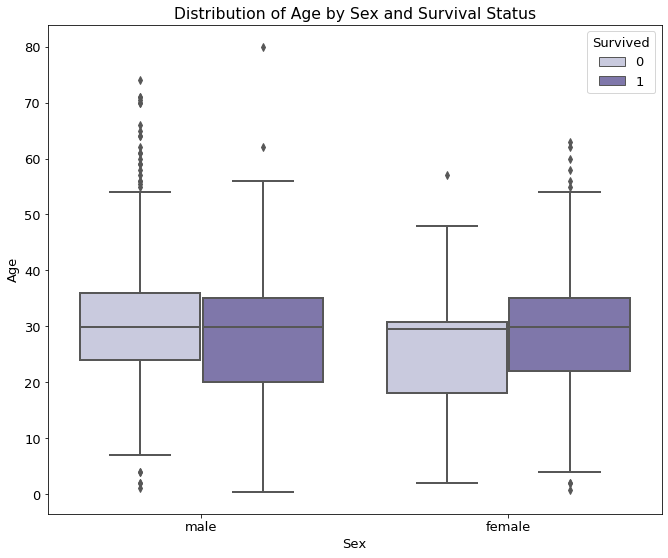

In [25]:
sns.boxplot(x='Sex', y='Age', data=train, hue='Survived', palette='Purples', linewidth=2)

plt.title('Distribution of Age by Sex and Survival Status')
plt.show()

>**<font color=purple>Swarmplots to show Distribution of a Continuous Variable grouped by Categorical Variables</font>**

`sns.swarmplot(x='categorical', y='continous', data=train , hue=another_cat  )`

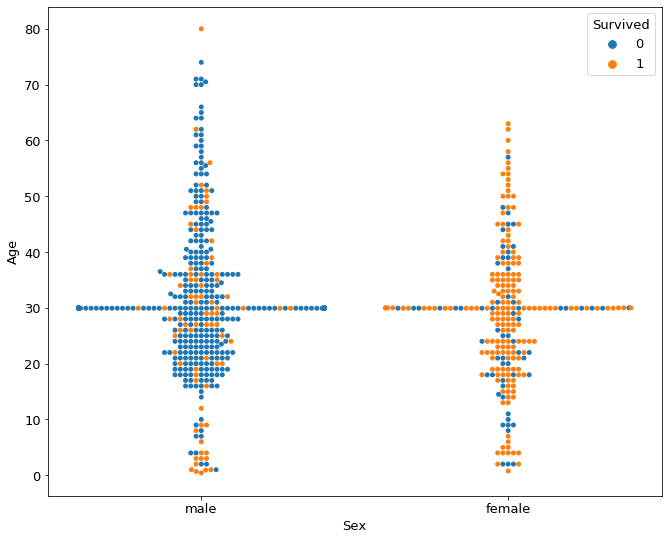

In [26]:
sns.swarmplot(x='Sex', y='Age', data=train , hue='Survived'  )

plt.title('')
plt.show()

>**<font color=purple>Violinplot Similar to Boxplots</font>**

`sns.violinplot(x='categorical', y='continous', data=train , hue=another_cat  )`

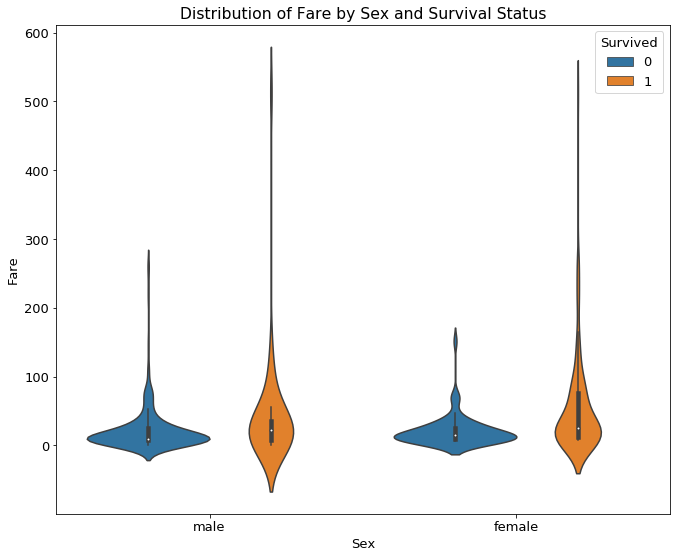

In [27]:
sns.violinplot(x='Sex', y='Fare', data=train , hue='Survived'  )

plt.title('Distribution of Fare by Sex and Survival Status')
plt.show()

>**<font color=purple>Histogram Subplots to View Distribution of Fare by Survival Status</font>**

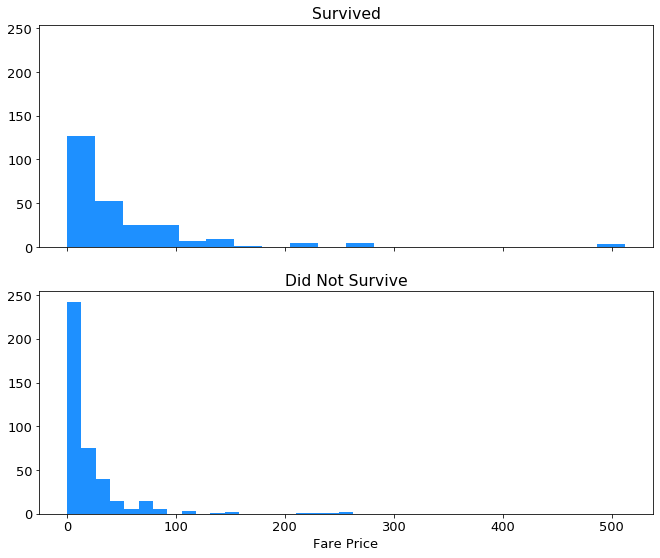

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

ax1.hist(train[train.Survived == 1].Fare, bins=20, color='dodgerblue')
ax1.set(title='Survived')


ax2.hist(train[train.Survived == 0].Fare, bins=20, color='dodgerblue')
ax2.set(title='Did Not Survive', xlabel='Fare Price')

plt.show()

>**<font color=purple>Crosstab with Heatmap to Group Variables and Understand Correlations</font>**

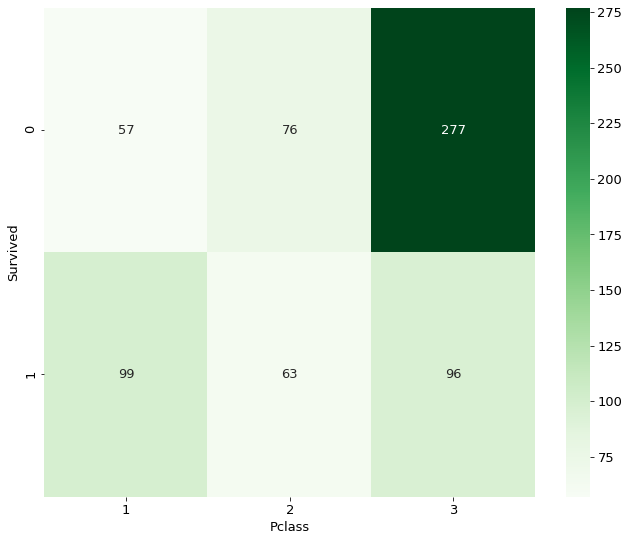

In [29]:
ctab = pd.crosstab(train.Survived, train.Pclass)

sns.heatmap(ctab, annot=True, cmap='Greens', fmt='d')
plt.show()

>**<font color=purple>Inspect percentages of overall population</font>**

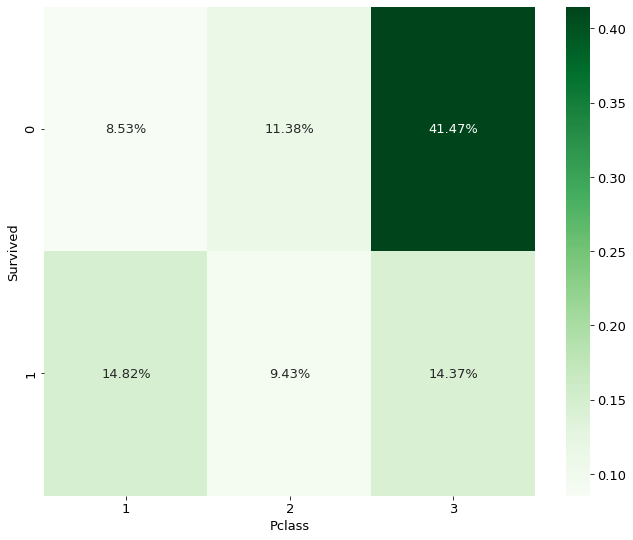

In [30]:
ctab = pd.crosstab(train.Survived, train.Pclass, normalize=True)

sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2%')
plt.show()

>**<font color=purple>Number and Percentage of People Who Survived</font>**

`train.Survived.sum()`

`train.Survived.mean()`

>**<font color=purple>Groupby to Explore Different Aggregations of Data</font>**

- `.groupby()` creates a Series with an index of the survival values and the mean fare value for each index value. 


- Adding `.plot.bar()` turns the index of your groupby into xlabels and the values into bar heights. **This is such a useful code snippet to put in your back pocket!**

`train.groupby('survival').fare.mean().plot.bar()`

>**<font color=purple>Inspect percentages by group</font>**

`normalize=False` shows raw value counts, not percentages

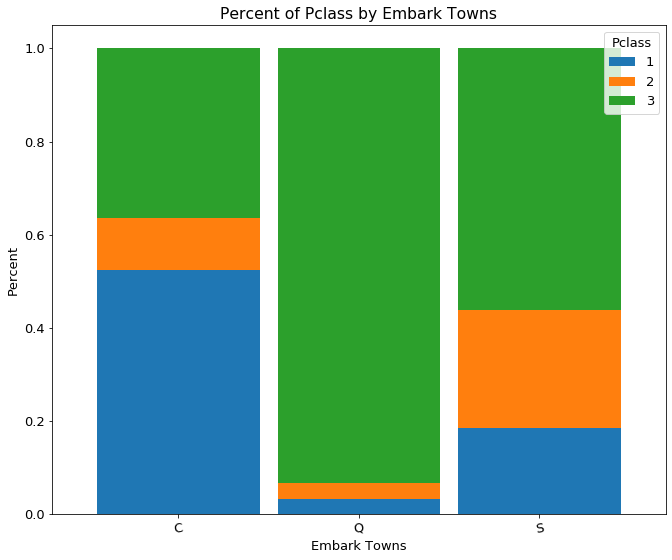

In [31]:
# custom aggregate to get value counts by group
(
train.groupby('Embarked')['Pclass']

# turn an index into columns and create bar plot
    .apply(lambda s: s.value_counts(normalize=True))  
    .unstack()                                        
    .plot.bar(stacked=True, width=.9)                 
)

plt.title('Percent of Pclass by Embark Towns')
plt.legend(title='Pclass')
plt.xticks(rotation=9)
plt.xlabel('Embark Towns')
plt.ylabel('Percent')

plt.show()

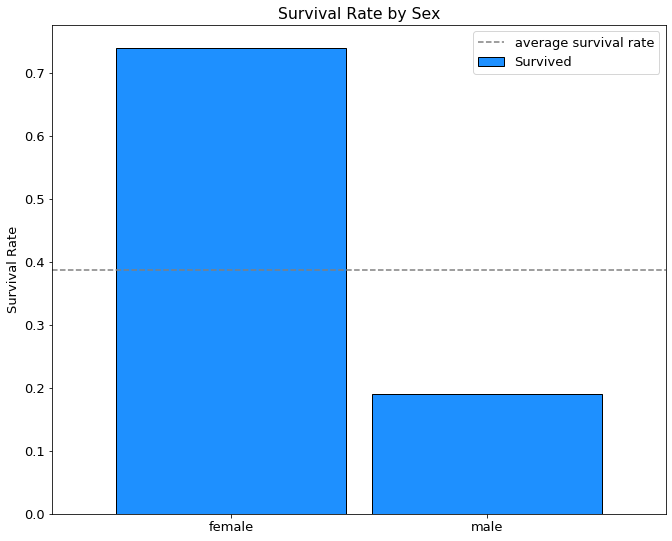

In [32]:
train.groupby('Sex').Survived.mean().plot.bar(ec='black', fc='dodgerblue', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.Survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')

plt.title('Survival Rate by Sex')
plt.legend()
plt.show()

>**<font color=purple>Using 2 Different Categories</font>**

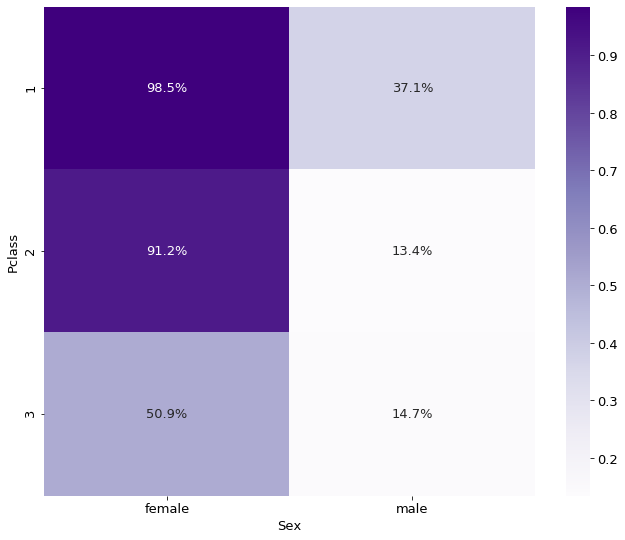

In [33]:
train.groupby(['Pclass', 'Sex']).Survived.mean()

ctab = pd.crosstab(train.Pclass, train.Sex, values=train.Survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

plt.show()

OR

        -> df.pivot_table(  values,    rows,     columns)
 

In [34]:
ctab = train.pivot_table('Survived', 'Pclass', 'Sex')
ctab

Sex,female,male
Pclass,,
1,0.985075,0.370787
2,0.912281,0.134146
3,0.508772,0.146718


>**<font color=purple>Binning for Exploration</font>** 

-Turning a continuous variable into a categorical one for viz

In [35]:
# splits age into 2 bins, 0-18 and 18-80
train['age_bin'] = pd.cut(train.Age, bins = [0, 18, 80], labels=['child', 'adult'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_female,age_bin
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,0,adult
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,1,child
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,0,adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,adult
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q,0,adult


In [36]:
# inspect survival rate of children and adults

train.groupby('age_bin').Survived.mean()

age_bin
child    0.500000
adult    0.366667
Name: Survived, dtype: float64

In [37]:
# for even intervals

pd.cut(train.Age, 3)      

660    (26.947, 53.473]
852      (0.34, 26.947]
703      (0.34, 26.947]
886    (26.947, 53.473]
525    (26.947, 53.473]
             ...       
98     (26.947, 53.473]
322    (26.947, 53.473]
382    (26.947, 53.473]
365    (26.947, 53.473]
510    (26.947, 53.473]
Name: Age, Length: 668, dtype: category
Categories (3, interval[float64]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [38]:
# for even number of observations in each interval

pd.qcut(train.Age, 3)

660     (31.0, 80.0]
852    (0.419, 26.0]
703    (0.419, 26.0]
886     (26.0, 31.0]
525     (31.0, 80.0]
           ...      
98      (31.0, 80.0]
322     (26.0, 31.0]
382     (31.0, 80.0]
365     (26.0, 31.0]
510     (26.0, 31.0]
Name: Age, Length: 668, dtype: category
Categories (3, interval[float64]): [(0.419, 26.0] < (26.0, 31.0] < (31.0, 80.0]]

>**<font color=purple>Melt</font>**

`pd.melt()` - This function deaggregates obesrvations; it gives you a key-value column pair. It allows us to combine multiple continuous measures on the same visualization.

`pd.melt(dataframe, [columns_to_keep], var_name='new_name for the 'key' column')`

>**<font color=purple>Pivot</font>**

`df.pivot_table(values, rows, columns)`

`df.pivot_table(values= , index= , columns= )`

OR

`df.pivot_table(values= , index=['', ''], columns= )`

Default in pivot_table: (aggfunc='mean')

>**<font color=purple>Subplots Using Simple pyplot</font>**

`plt.subplot(2, 1, 1)` # figure 1 of 2

`plt.plot(x, y)`       # everything up until the next subplot is on the first

`plt.show()`
    
`plt.subplot(2, 1, 2)` # figure 2 of 2

`plt.plot(y, x)`       # everything up until the next subplot is on the second

`plt.show()`

>**<font color=purple>Using Matplotlib Object-Oriented API</font>**

A figure in matplotlib is divided into two different objects:

- The Figure Class: It can contain one or more axes objects.

- The Axes Object: It represents one plot inside of a figure object.

subplots(nrows, ncols)

`fig, axes = plt.subplots(2,1)`

`axes[0].plot(x, y)`

`axes[0].set(title='My Title')`

`axes[1].plot(y, x)`

`axes[1].set(title='My Title')`

`axes[1].set_xticklabels()`

`fig.tight_layout()`

>**<font color=purple>Glossary for Matplotlib Figures</font>**

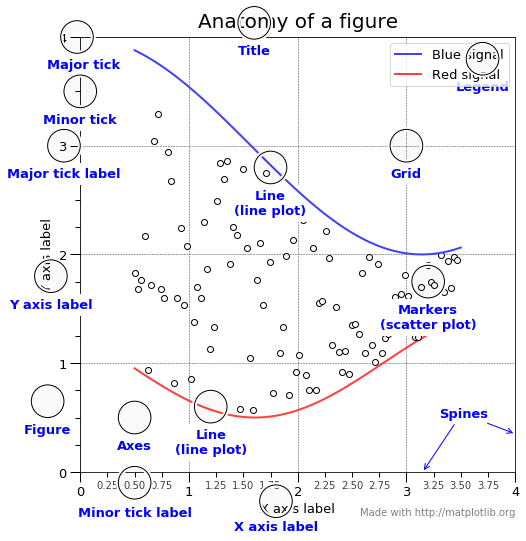

In [39]:
anatomy_of_a_figure()

**There's some pretty cool EDA code and explanation in [this article.](https://towardsdatascience.com/exploratory-data-analysis-for-linear-regression-classification-8a27da23debc) Check it out!**

**Here are the official matplotlib [tutorials](https://matplotlib.org/3.1.1/tutorials/index.html#introductory)**

## Evaluating

### **<font color=red>What Are Evaluation Metrics for Classification Models?</font>**

There are different metrics we can use to understand how well our classification model is predicting. Context will guide you toward the most valuable metric for your particular situation.

![image.png](https://i.stack.imgur.com/LIWH1.jpg)

----

>**Accuracy:** This tells you how often your classifier is **predicting correctly overall**. 

This is the ratio of all of your correct predictions over all of your data points. 

(Total Number Correct / Total Number of Data Points) -> (TP + TN / TP + TN + FP + FN)

----

>**Recall:** The Recall score tells you how often your classifier is catching the positive cases in your dataset. It describes how good the model is at predicting the positive class when the actual outcome is positive. In other words, Recall tells you what percentage of the time your model is identifying the relevant cases in your dataset.

**<font color=green>The Higher the Recall Score == The better your Classifier is at catching the actual positive cases in your dataset.</font>**

**<font color=red>The Lower the Recall Score == The more your Classifier is making Type II Errors / Misses / False Negatives.</font>**

(Total Number of Correct Positive Predictions / Total Number of Actual Positive Observations in Dataset) -> (TP / TP + FN)

----

>**Precision:** The Precision score tells you how often your model was able to **predict positives correctly.** In other words, precision is the proportion of observations your model predicts to be relevant that were actually relevant and not false alarms or false positives.


**<font color=green>The Higher the Precision Score == The better your Classifier is at Predicting Positives Precisely in your dataset.</font>**

**<font color=red>The lower the Precision Score == The more your Classifier predicted a lot of positives where there were none, False Positives / Type I Errors / False Alarms</font>**

- If your model's Precision score goes up, the cost is that your model's Recall score goes down. You have to decide which is more important in your situation.

(Total Number of Correct Positive Predictions / Total Number of Observations Predicted as Postive by Model) -> (TP / TP + FP)

----

>**f1-score:** The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better when you are looking to optimize for both Recall and Precision.

----

>**ROC Curve:** The Receiver Operating Characteristic Curve (ROC Curve) summarizes the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. ROC curves are appropriate when the observations are balanced between each class in a binary classification problem.

![image.png](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

- It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

----

**Baseline:** Predicting the most common case for everything.

- 70% of your observations are non-smokers. You predict all of your observations are non-smokers. Your Baseline predicts correctly 70% of the time, or in other words, your baseline accuracy is 70%. If your model doesn't predict correctly more than 70% of the time, your model doesn't add value.

To evaluate the performance of your classification model, you can also create a Confustion Matrix. 

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSmzFvEZ0uhNbNa39AP7Yd_Net4osjEHOxurVREHFKHqEKZwwnQ&usqp=CAU)

### **<font color=orange>So What If...?</font>**

**<font color=purple>Recall</font>**


- If your Recall score is high, your model didn’t miss a lot of positives; it's good at catching positive instances.

>For example, if your model is predicting positive for churn and your Recall score is high, your model is good at identifying customers who are positive for churn or actually churning.

- As your Recall score gets lower, your model is not predicting more of the positives that are actually there; you are missing Positive observations.

>For example, if your model is predicting positive for churn and your Recall score is low, your model is not good at identifying customers who are churning. It is predicting a lot of False Negatives; you are missing the opportunity to find and woo customers who are going to churn. These are Misses, missed opportunities to identify and keep customers who are actually positive for churn. **These are Type II Errors**

**You want to optimize for recall when missed positives are expensive.**

**<font color=purple>Precision</font>**

- The higher your precision score is, the better your model is at **Predicting Positives Precisely!** It avoids predicting a lot of False Positives but it is missing more of the Actual Positives, too. 


- As your Precision score gets lower, your model predicted a lot of False Postives or positives where there were none.

**You want to optimize for Precision when False Positives are expensive.**


### **<font color=green>Now What?</font>**

>**Using sklearn**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

X_train = train[['Pclass', 'Is_female']]
y_train = train[['Survived']]

X_test = test[['Pclass', 'Is_female']]
y_test = test[['Survived']]

logit = LogisticRegression(random_state=123).fit(X_train, y_train)

>**Create Evaluation DataFrame**

In [41]:
eval_df = train[['Survived']].rename(columns={'Survived': 'actual'})

eval_df['yhat'] = logit.predict(X_train)

eval_df['probs'] = logit.predict_proba(X_train)[:, 1]

eval_df.head()

,actual,yhat,probs
660,1,0,0.424812
852,0,1,0.598620
703,0,0,0.107580
886,0,0,0.229811
525,0,0,0.107580


>**Accuracy Score**

In [42]:
logit.score(X_train, y_train)

0.7844311377245509

>**Recall Score**

In [43]:
recall_score(eval_df.actual, eval_df.yhat, average=None)

array([0.84878049, 0.68217054])

>**Precision Score**

In [44]:
precision_score(eval_df.actual, eval_df.yhat, average=None)

array([0.80930233, 0.7394958 ])

>**Confusion Matrix**

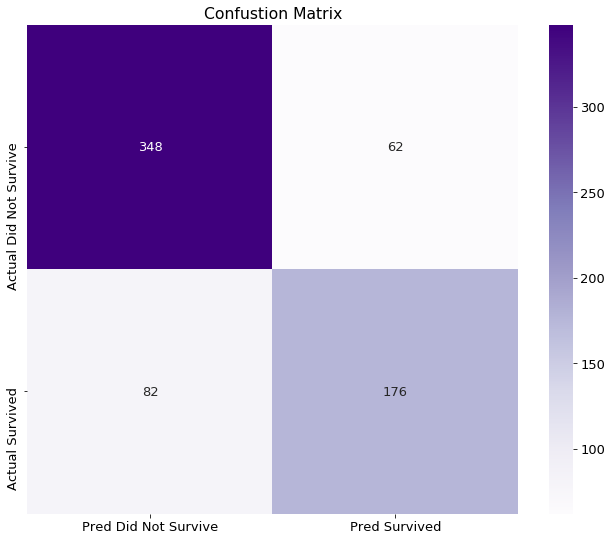

In [45]:
cm = confusion_matrix(eval_df.actual, eval_df.yhat)
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', yticklabels=['Actual Did Not Survive', 'Actual Survived'], xticklabels=['Pred Did Not Survive', 'Pred Survived'])

plt.title('Confustion Matrix')
plt.show()

OR

In [46]:
pd.crosstab(eval_df.actual, eval_df.yhat, 
            rownames=['Actual'], 
            colnames=['Predicted'], margins=False, margins_name="Total")

Predicted,0,1
Actual,,
0,348,62
1,82,176


>**Classification Report**

In [47]:
print(classification_report(eval_df.actual, eval_df.yhat))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       410
           1       0.74      0.68      0.71       258

    accuracy                           0.78       668
   macro avg       0.77      0.77      0.77       668
weighted avg       0.78      0.78      0.78       668



## Modeling to come...

## Modeling

### **<font color=red>What Are Types of Classification Models?</font>**

>**Logistic Regression Model**

- Maps any real value into a number between 0 and 1 representing the probability that an observation is in the positive class.


- **Overall**, makes a great baseline model because of the quick and easy implementation and ease of interpretation.



- **Pros:** Easy to interpret, fast to train and predict


- **Cons:** Not as interpretable as showing a picture like a Decision Tree Classifier, assumption that the X predictors are independent, multi-class classification gets more complicated to interpret and explain




### **<font color=orange>So What?</font>**

- Both Scikit-Learn and Statsmodels can be used to create and evaluate Logistic Regression Classifiers.


- When we have a multiclass classifier, the coefficients of the X variables can inform us of their importance. 


- Our predictions are a number between 0 and 1 informing us of the probability that an observation is in the positive class.


- We can set a threshold to 'snap' our probabilities to a 0 or 1, not a member of our positive class or member of the positive class respectively.


- As you decrease your threshold, the Recall of your model increases. This is a good idea when you want to decrease your Type II errors or False Negatives. When it's more costly to miss a positive, you might decrease your threshold a bit.


- As you increase your threshold, the Precision of your model increases. This is a good idea when you want to make sure that your model has less Type I errors or False Positives. When it's more costly to falsely identify an observation as a positive case that is actually a negative case, you might want to increase your threshold a bit.

### **<font color=green>Now What?</font>**



----

>**Logistic Regression**


>**Decision Tree Model**


>**Random Forest Model**


>**K-Nearest Neighbor****